# Uber Supply-Demand Gap Assignment

<br>Student : Phuc Thanh Nguyen
<br>Email   : phucnguyenthanh.stu@gmail.com

# I. Import Libraries and Load Data

In [1]:
import os
import datetime
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load data
df = pd.read_csv("./Uber Request Data.csv")

df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [3]:
df.shape

(6745, 6)

# II. Data Cleansing

## 1. Checking data

In [4]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
# Check Null data
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
# Check dupplitcate in "request id"
df["Request id"].duplicated().sum()

0

In [8]:
# Checking "Pickup point"
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [9]:
# Checking "Driver ID"
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [10]:
df[df['Status'] == 'Trip Completed'].isna().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

In [11]:
df[df['Status'] != 'Trip Completed'].isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

### Oservation
<ul>
    <li> We don't care about Driver ID </li>
    <li> There is no duplicates found in "Request id" </li>
    <li> "Picking point" and "Status" is well formated, no need spelling fix </li>
    <li> Time in differents format and need to be standardize </li>
    <li> All the request id with is not completed (mean "Cancalled" or "No Cars Available") have NaN Drop timestamp </li>

## 2. Cleansing data and derive

In [12]:
df['Drop timestamp'].fillna(0)

0           11/7/2016 13:00
1           11/7/2016 18:47
2            12/7/2016 9:58
3           12/7/2016 22:03
4       13-07-2016 09:25:47
               ...         
6740                      0
6741                      0
6742                      0
6743                      0
6744                      0
Name: Drop timestamp, Length: 6745, dtype: object

In [13]:
df['Request DateTime'] = pd.to_datetime(df['Request timestamp'],dayfirst=True)
df['Drop DateTime']    = pd.to_datetime(df['Drop timestamp'],dayfirst=True)
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request DateTime,Drop DateTime
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00


In [14]:
# Show the data types of formatted "Request" and "Drop"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   object        
 5   Drop timestamp     2831 non-null   object        
 6   Request DateTime   6745 non-null   datetime64[ns]
 7   Drop DateTime      2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.7+ KB


In [15]:
# Drop the "Request timestamp" and "Drop timestamp" columns
df = df.drop('Request timestamp', axis=1)
df = df.drop('Drop timestamp', axis=1)
df.head(10)

,Request id,Pickup point,Driver id,Status,Request DateTime,Drop DateTime
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [16]:
# Because we don't care about Driver ID in this analysis, so drop it
df = df.drop('Driver id', axis=1)
df.head(10)

,Request id,Pickup point,Status,Request DateTime,Drop DateTime
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [17]:
# We see that there is only a few days in Request Datetime, let see what day
df['Request DateTime'].dt.date.unique()

array([datetime.date(2016, 7, 11), datetime.date(2016, 7, 12),
       datetime.date(2016, 7, 13), datetime.date(2016, 7, 14),
       datetime.date(2016, 7, 15)], dtype=object)

In [18]:
# Let see if this happen to Drop Datetime
df['Drop DateTime'].dt.date.unique()

array([datetime.date(2016, 7, 11), datetime.date(2016, 7, 12),
       datetime.date(2016, 7, 13), datetime.date(2016, 7, 14),
       datetime.date(2016, 7, 15), datetime.date(2016, 7, 16), NaT],
      dtype=object)

### Observation:
<ul>
    <li> There is only 6 days in July 2016 in data </li>

In [19]:
# We derive "Request Datatime" and "Drop Datetime" into Day of Week and time in day

# Time in day
def time_in_day(x):
    time_in_day = ""
    if x>=0 and x<4:
        time_in_day = "Late night"
    elif x<7:
        time_in_day = "Early morning"
    elif x<12:
        time_in_day = "Morning"
    elif x<17:
        time_in_day = "Afternoon"
    elif x<21:
        time_in_day = "Evening"
    else:
        time_in_day = "Night"
    
    return time_in_day

# Derive
df['Request Day of Week'] = df['Request DateTime'].dt.day_name()
df['Drop Day of Week']    = df['Drop DateTime'].dt.day_name()
df['Request Time in Day'] = df['Request DateTime'].dt.hour.apply(time_in_day)
df['Drop Time in Day']    = df['Drop DateTime'].dt.hour.apply(time_in_day)
df['Request Hour']        = df['Request DateTime'].dt.hour
df['Drop Hour']           = df['Drop DateTime'].dt.hour

In [20]:
df.head(10)

,Request id,Pickup point,Status,Request DateTime,Drop DateTime,Request Day of Week,Drop Day of Week,Request Time in Day,Drop Time in Day,Request Hour,Drop Hour
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,Monday,Morning,Afternoon,11,13.0
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,Monday,Evening,Evening,17,18.0
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday,Tuesday,Morning,Morning,9,9.0
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday,Tuesday,Night,Night,21,22.0
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,Wednesday,Morning,Morning,8,9.0
5,3879,Airport,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,Wednesday,Wednesday,Night,Night,21,22.0
6,4270,Airport,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,Thursday,Thursday,Early morning,Morning,6,7.0
7,5510,Airport,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,Friday,Friday,Early morning,Early morning,5,6.0
8,6248,City,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,Friday,Friday,Evening,Evening,17,18.0
9,267,City,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,Monday,Monday,Early morning,Morning,6,7.0


In [21]:
df.isna().sum()

Request id                0
Pickup point              0
Status                    0
Request DateTime          0
Drop DateTime          3914
Request Day of Week       0
Drop Day of Week       3914
Request Time in Day       0
Drop Time in Day          0
Request Hour              0
Drop Hour              3914
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Request id           6745 non-null   int64         
 1   Pickup point         6745 non-null   object        
 2   Status               6745 non-null   object        
 3   Request DateTime     6745 non-null   datetime64[ns]
 4   Drop DateTime        2831 non-null   datetime64[ns]
 5   Request Day of Week  6745 non-null   object        
 6   Drop Day of Week     2831 non-null   object        
 7   Request Time in Day  6745 non-null   object        
 8   Drop Time in Day     6745 non-null   object        
 9   Request Hour         6745 non-null   int64         
 10  Drop Hour            2831 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 579.8+ KB


# III. Analysis

## 1. Pickup point

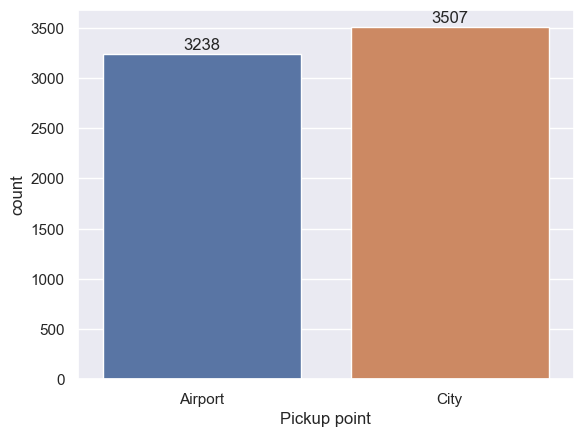

In [23]:
#looking for insight in pickup point
sns.set(style="darkgrid")
ax = sns.countplot(x="Pickup point", data=df)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, int(value), ha="center")
plt.show()

### Observation
<li> Pickup locations between Airport and City seems quite balanced, and request for pickup at City get a little higher frequency.

## 2. Status

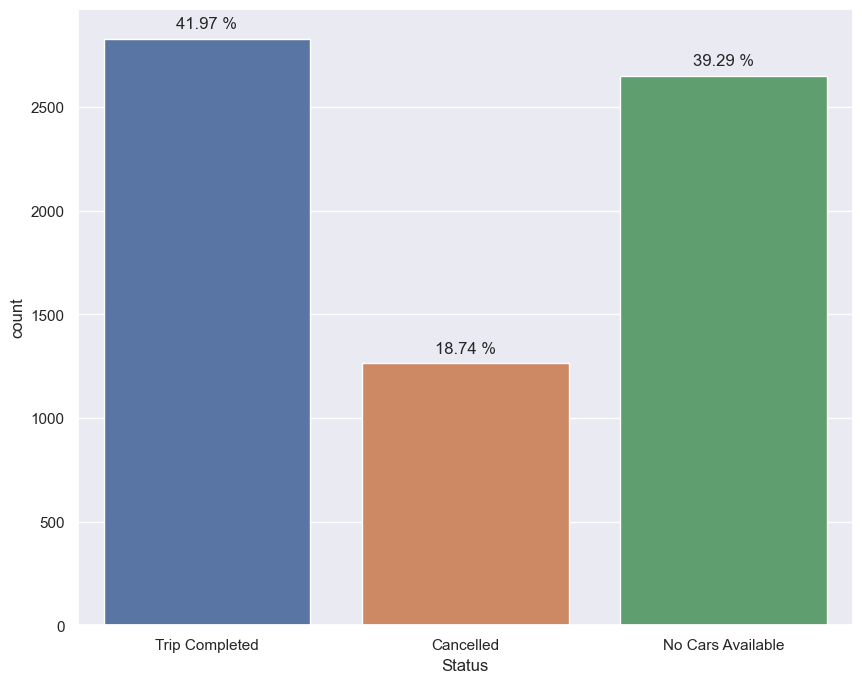

In [24]:
#looking for insight in status
plt.figure(figsize=(10, 8))
ax =sns.countplot(x="Status", data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

### Observation:
<ul>
    <li> Only 41.97% requests from city and airport gets completed

## 3. Request Day of Week

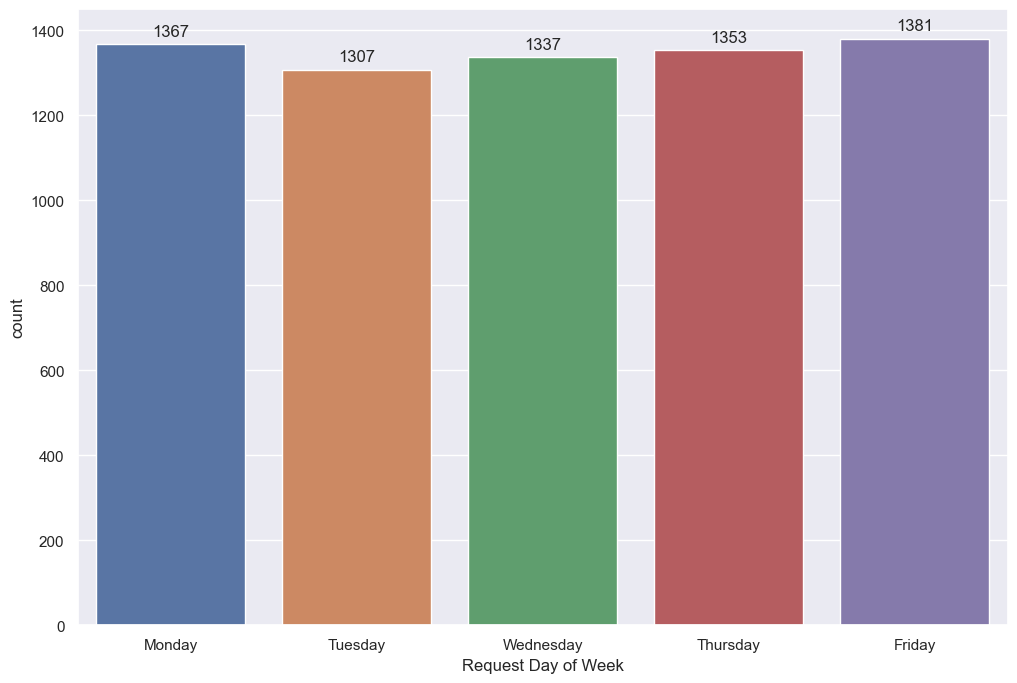

In [25]:
#looking to find the request count vs daysof week
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Request Day of Week', data=df)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+20
    ax.text(X, Y, int(value), ha="center")
plt.show()

## Observation:
<li> There isn't much difference in requests vs days of the week

## 4. Request Time in Day and Hour

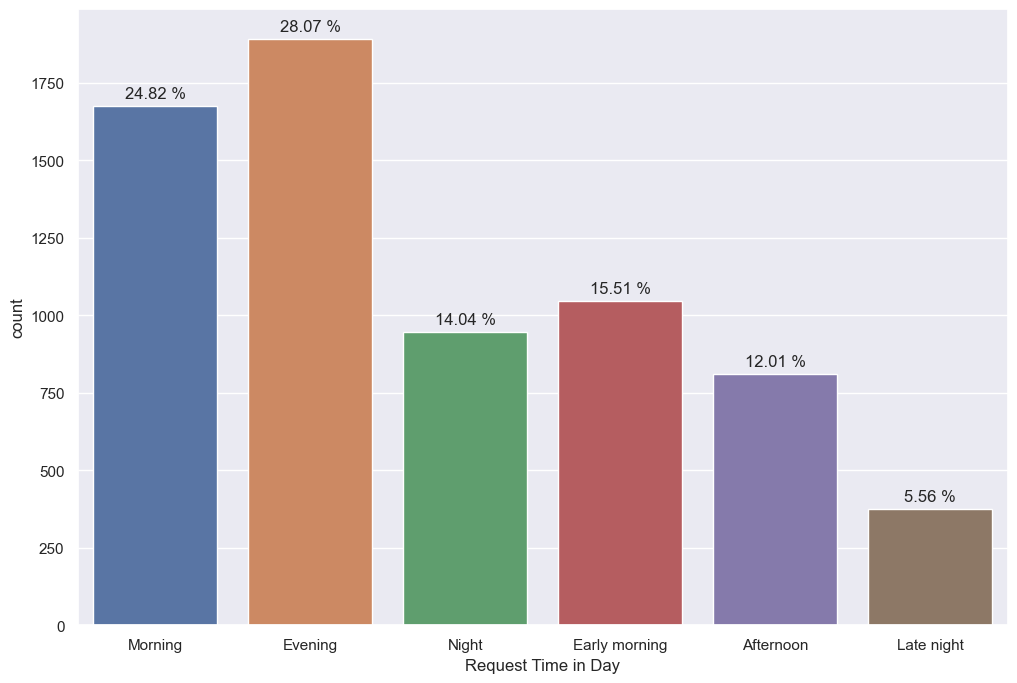

In [26]:
#looking to find the request count vs daysof week
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='b')
ax =sns.countplot(x='Request Time in Day', data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+25
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

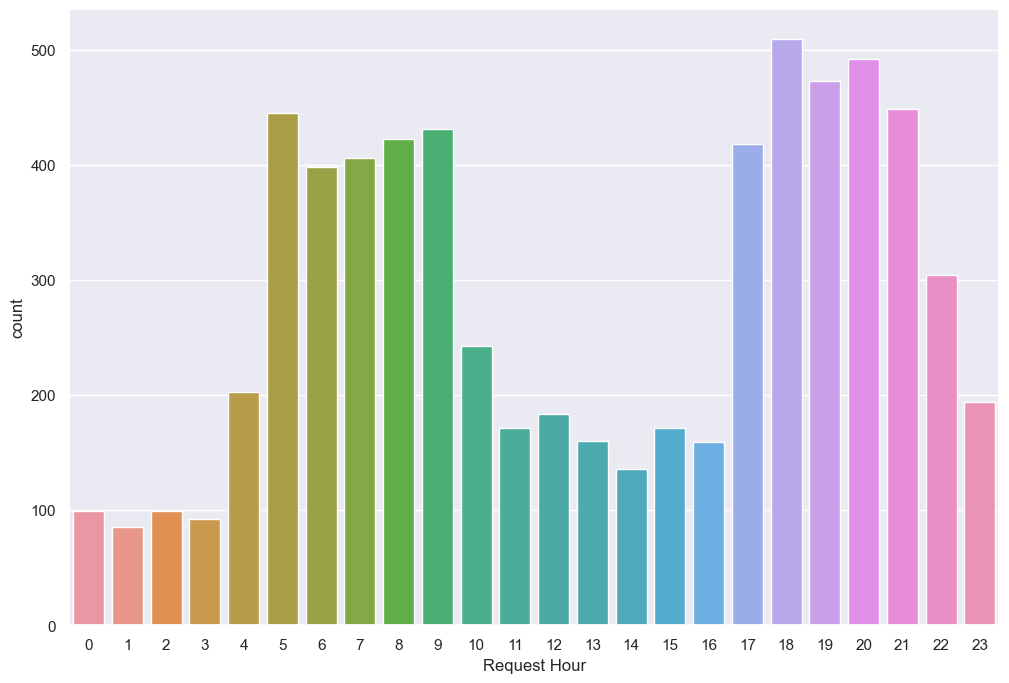

In [27]:
#looking for insight in request hour
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Request Hour', data=df)
plt.show()

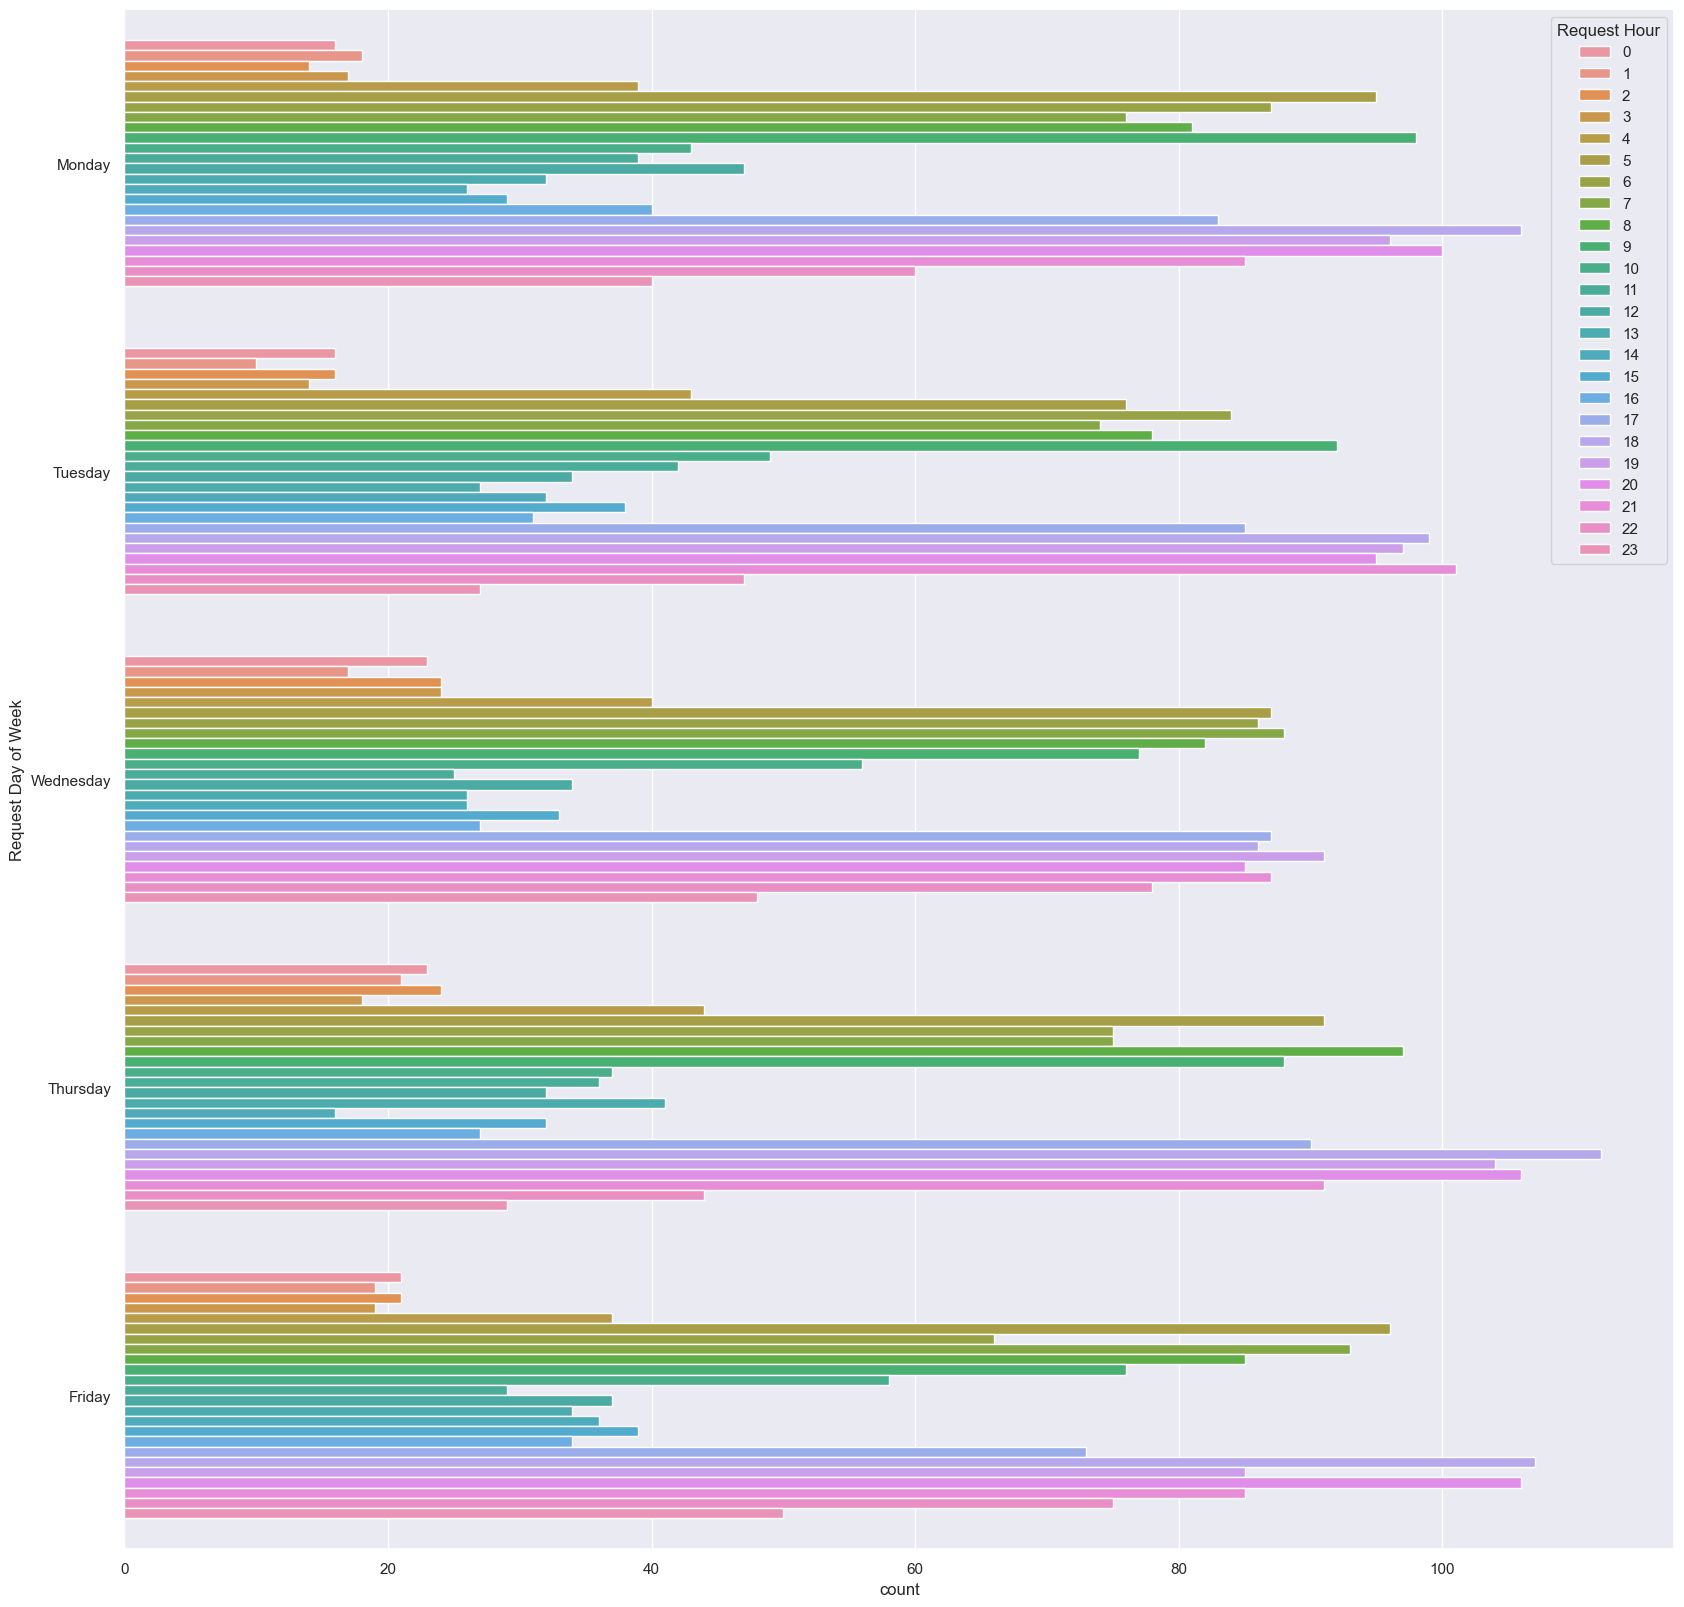

In [28]:
# Check if high request rates from 5am to 9am and 5pm to 10 pm is consistent throughout all days

plt.figure(num=None, figsize=(20, 20), facecolor='w', edgecolor='b')
sns.countplot(y='Request Day of Week',hue="Request Hour", data=df)
plt.show()

## Observation:
<li> All dates high request rates is around the same time -5am to 9am and 5pm to 10 pm

## 5. Pickup point with Status and Time in Day

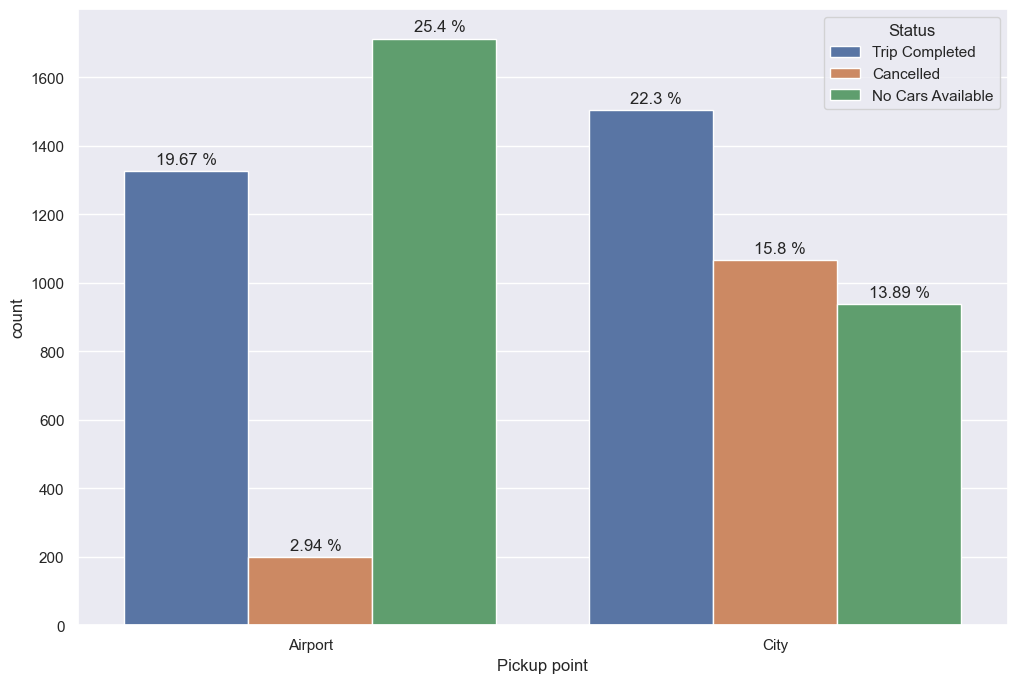

In [29]:
# Segmenting pickup point over status
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Pickup point', hue="Status", data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.2
    Y = p.get_height()+20
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()


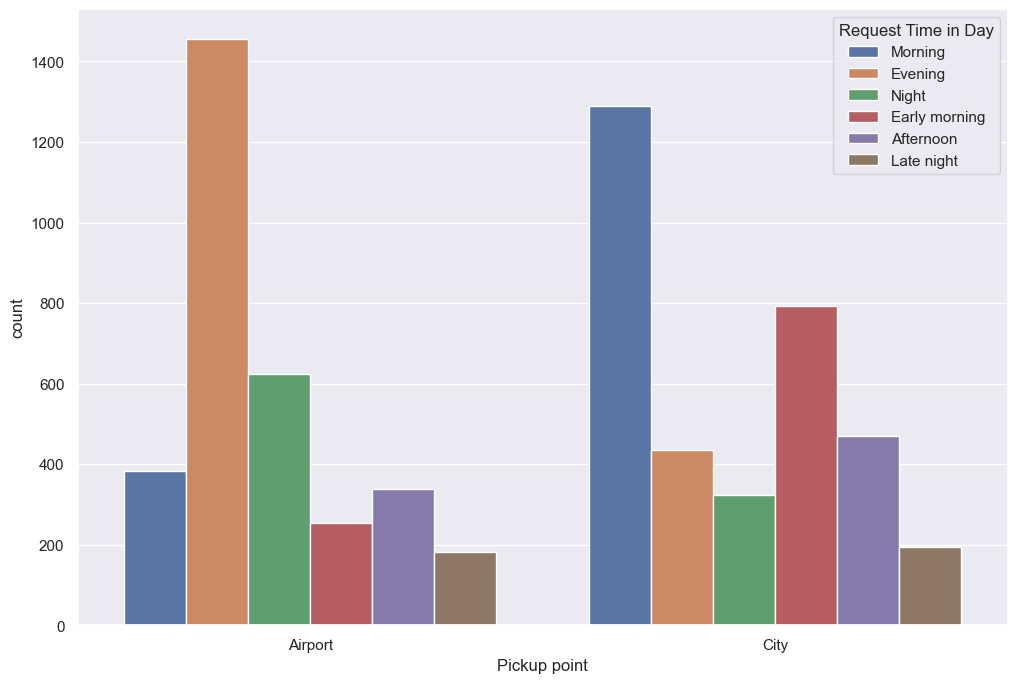

In [30]:
# Segmenting pickup point over Time in Day
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Pickup point', hue="Request Time in Day", data=df)
plt.show()

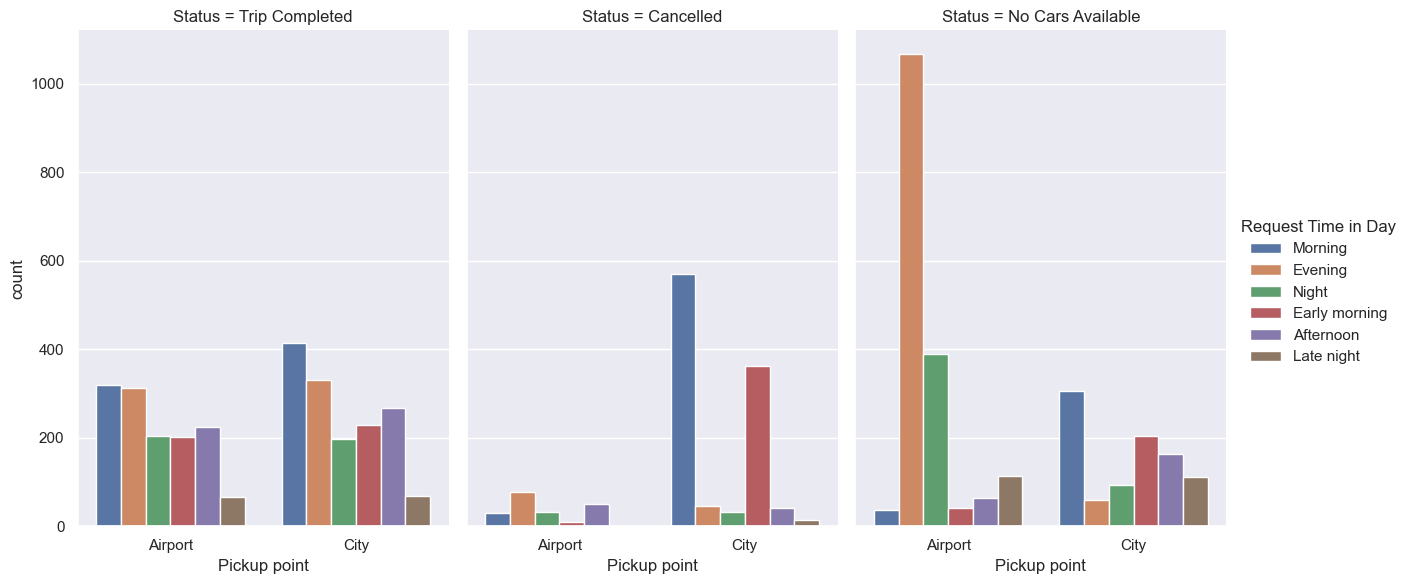

In [31]:
# Segmenting the Time in Day vs both Status and Pickup point 
sns.catplot(x='Pickup point', 
            col="Status", 
            hue = 'Request Time in Day',
            data=df,
            kind="count",
            height=6,
            aspect= 0.7,
            ci=85,
            col_wrap=3,
            margin_titles=True)
plt.show()

## Observation:
<ul>
    <li> Airport pickup point has most 'No car available'. </li>
    <li> City pickup point has highest 'Cancelled' status </li>
    <li> 'Airport' - has the hightest request in the 'evening' aligning to our 'no car available' status </li>
    <li> 'City'- has the hightest request in the 'morning' aligning to our 'Cancelled' status. </li>

## 6. Demand and Supply Gap

In [32]:
df['Demand'] = 1
df['Supply'] = df['Status'].apply(lambda x: 1 if x == "Trip Completed" else 0)

In [33]:
df['Supply'].value_counts()

0    3914
1    2831
Name: Supply, dtype: int64

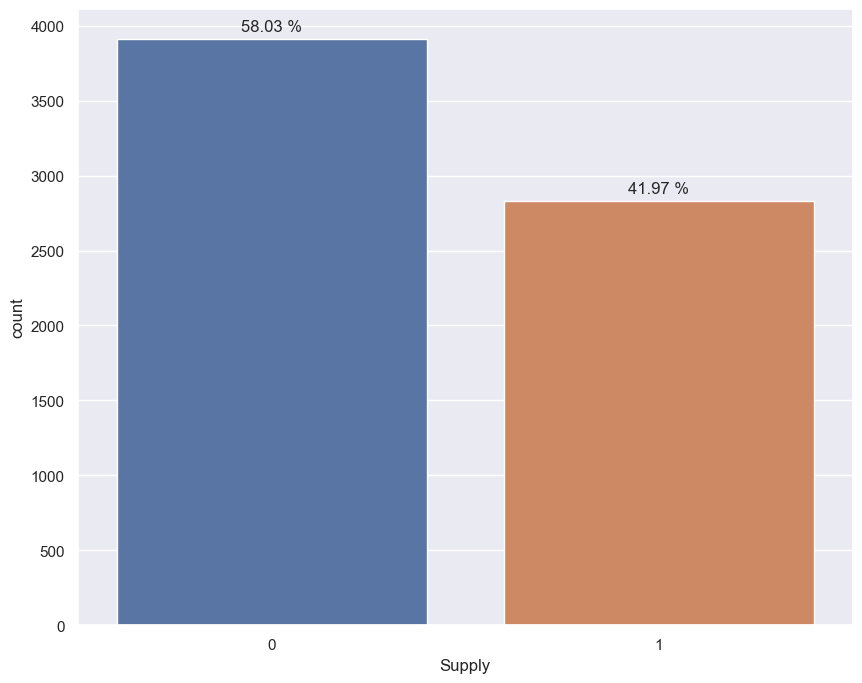

In [34]:
#looking for insight in status
plt.figure(figsize=(10, 8))
ax =sns.countplot(x="Supply", data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

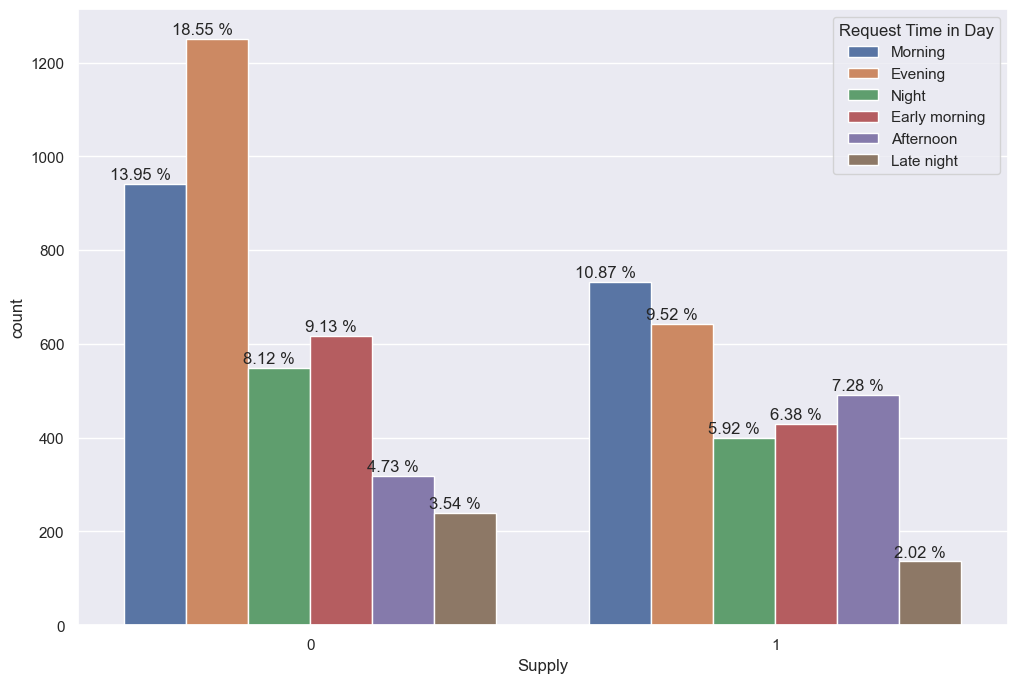

In [35]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Supply',hue="Request Time in Day", data=df)
total = len(df['Supply'])
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.1
    Y = p.get_height()+10
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

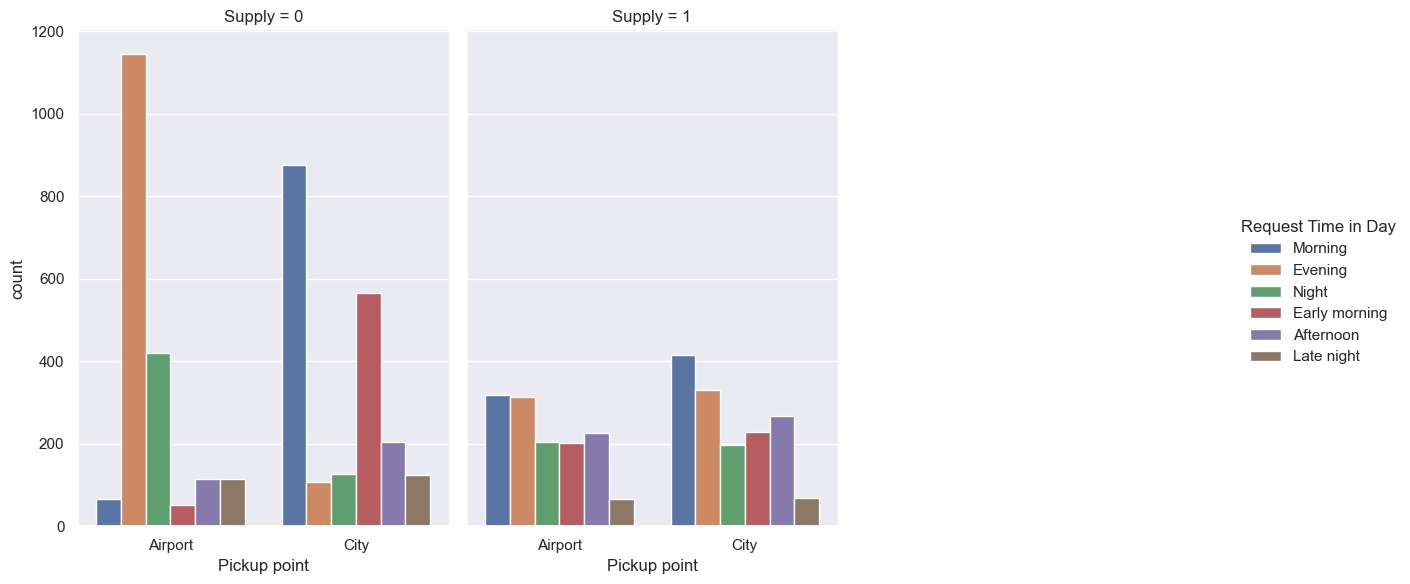

In [36]:
sns.catplot(x='Pickup point', 
            col="Supply", 
            hue = 'Request Time in Day',
            data=df,
            kind="count",
            height=6,
            aspect= 0.7,
            ci=85,
            col_wrap=3,
            margin_titles=True)
plt.show()

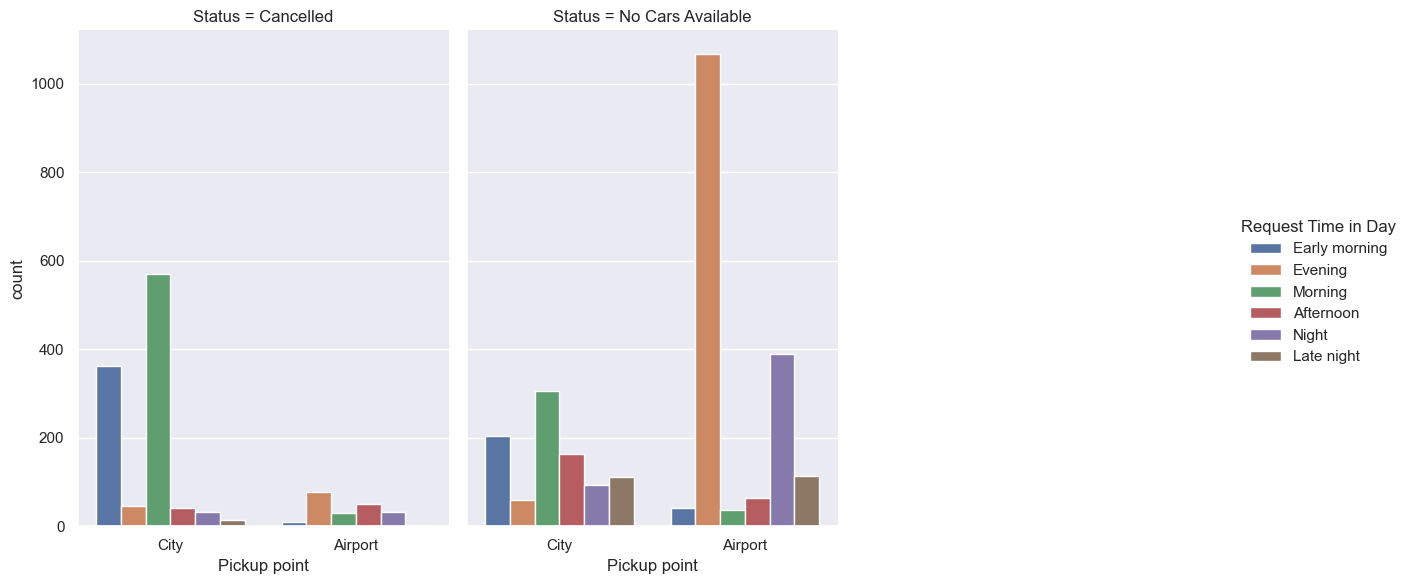

In [37]:
sns.catplot(x='Pickup point', 
            col="Status", 
            hue = 'Request Time in Day',
            data=df[df['Supply']==0],
            kind="count",
            height=6,
            aspect= 0.7,
            ci=85,
            col_wrap=3,
            margin_titles=True)
plt.show()

## Observation
<li> From the total gap percentage(58.02%) -around 15% gap exist during morning and evenings.
<li> Airport has highest gap at 17-21 hours which is evening hours, mostly due to “No car available”
<li> City has highest gap at 7-12am hours which is morning hours, mostly due to “Cancelled”

# IV. Conclusion:

## Observation

The problematic status are 'cancelled' and 'no cars available' as it leads to potential loss of revenue. We observed the hightest value of:
<ul>
    <li> Status: "No car available"
        <ul>
            <li> Where is it happening: Airport - i.e airport to city</li>
            <li> When is it happening: Evening </li>
        </ul>
    <li> Status: "Cancelled"
        <ul>
            <li> Where is it happening: City - i.e city to airport</li>
            <li> When is it happening: Morning </li>
        </ul>
    </li>
</ul>

The above points are in sync with highest request rates coming from morning and evening slot.

To make our analayse our observation so far, we further looked into the 'Supply'. This again is in sync with above observations. The gap which exists are the hightest:
<ul>
    <li> Status: "No car available" </li>
    <li> Where is it happening: Airport - i.e airport to city </li>
    <li> When is it happening: Evening </li>
</ul>
Status: "Cancelled"
Where is it happening: City - i.e city to airport
When is it happening: Morning. 

And vice versa is not true:

   1. Morning hours :There is no high demand for cabs from airport to city 
   2. Evening hours: There is no high demand for cabs from city to airport

This tells us that there are more outbound flights in the morning and inbound flights in the evening.

## The reason for the issue:
In the morning hours: Though there is high demand for cabs from city to airport, the vice versa is not true.
                      Hence the driver tends to 'cancel' the request as getting a return trip from airport 
                      to city would be tough.

In the evening hours: Though there is high demand for cabs from airport to city, the vice versa is not true.
                      Hence 'no cars available' in the airport is the hightest in the evening.

## Possible suggestions to fill the supply demand gap:
1. Provide incentives for airport trips during peak time.
2. Assigning few extra cabs specially to the airport trips.
3. Fixing a base price for drivers idle time in the airport or to come back to the city without any passenger.
4. Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day.
5. Promote continuous trip to airport with incentives.
6. Promote advance booking to airports and at the same time keeping drivers updated will the flight schedule with help them plan their work and they can accept the request as per their work plan.